In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/animal.zip

Archive:  /content/gdrive/MyDrive/animal.zip
   creating: animal_dataset/images/
   creating: animal_dataset/images/train/
  inflating: animal_dataset/images/train/1.jpg  
  inflating: animal_dataset/images/train/10.jpg  
  inflating: animal_dataset/images/train/1000.jpg  
  inflating: animal_dataset/images/train/1001.jpg  
  inflating: animal_dataset/images/train/1002.jpg  
  inflating: animal_dataset/images/train/1003.jpg  
  inflating: animal_dataset/images/train/1004.jpg  
  inflating: animal_dataset/images/train/1005.jpg  
  inflating: animal_dataset/images/train/1006.jpg  
  inflating: animal_dataset/images/train/1007.jpg  
  inflating: animal_dataset/images/train/1008.jpg  
  inflating: animal_dataset/images/train/1009.jpg  
  inflating: animal_dataset/images/train/101.jpg  
  inflating: animal_dataset/images/train/1010.jpg  
  inflating: animal_dataset/images/train/1011.jpg  
  inflating: animal_dataset/images/train/1012.jpg  
  inflating: animal_dataset/images/train/1013.jpg  

In [ ]:
!pip install utils

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/107.7 GB disk)


In [ ]:
# Train YOLOv5s
!python train.py --img 415 --batch 31 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=31, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 196 --conf 0.25 --source ../test1.jpeg

detect: weights=['runs/train/exp2/weights/best.pt'], source=../test1.jpeg, data=data/coco128.yaml, imgsz=[196, 196], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [196, 196] must be multiple of max stride 32, updating to [224, 224]
image 1/1 /content/test1.jpeg: 160x224 1 bird, 1 zebra, 60.1ms
Speed: 0.4ms pre-process, 60.1ms inference, 1.3ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/detect/exp3


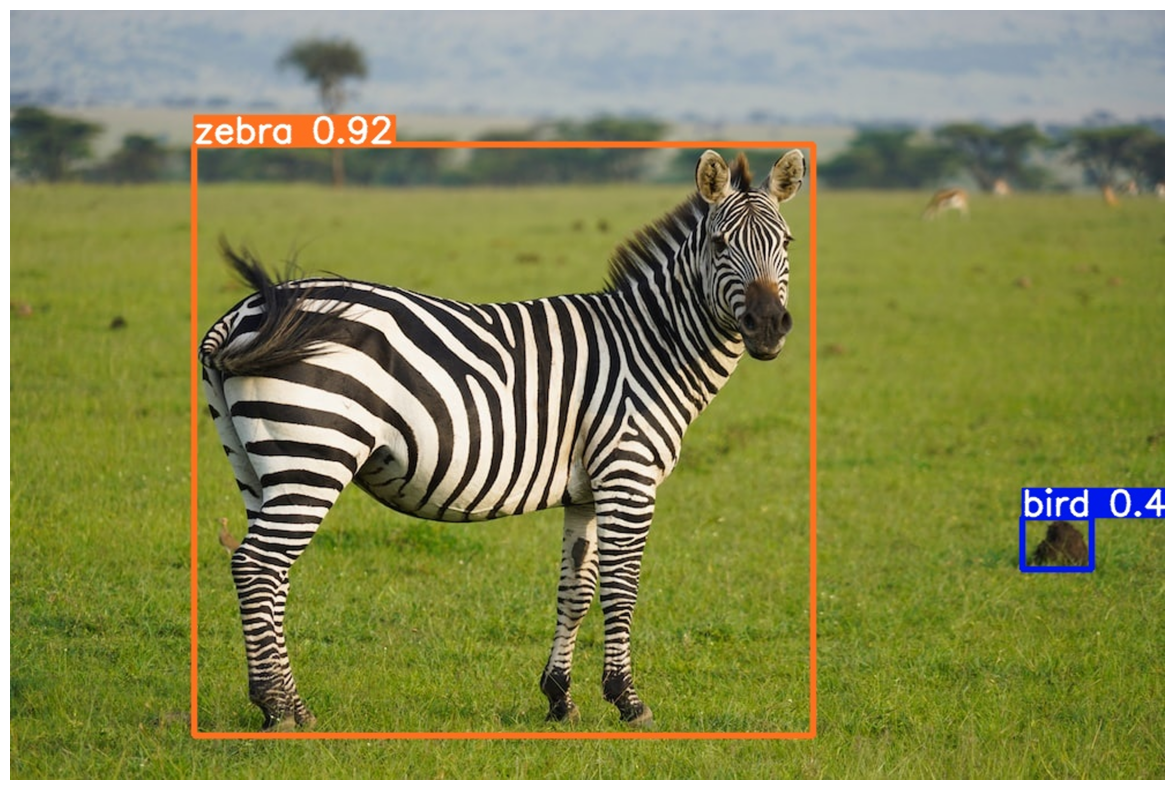

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("runs/detect/exp3/test1.jpeg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()